<a href="https://colab.research.google.com/github/raphateixeira/MScRaphael/blob/main/Malaria_3_modelos_3CasasDecimais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar pacotes necessários (caso ainda não estejam instalados)
!pip install -q efficientnet-pytorch kagglehub

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00


In [ ]:
!pip install -U torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.

In [ ]:
!pip install -U torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights
from efficientnet_pytorch import EfficientNet
import kagglehub

In [ ]:
# ========== DOWNLOAD ==========
# Baixa o dataset para ~/.kagglehub
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")
print("Dataset baixado em:", path)


Dataset baixado em: /kaggle/input/cell-images-for-detecting-malaria


In [ ]:
# ========== COPIAR PARA /kaggle/working ==========
original_path = os.path.join(path, "cell_images")
working_path = "/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images"

if not os.path.exists(working_path):
    shutil.copytree(original_path, working_path)

In [ ]:
# ========== REMOVER ARQUIVOS .db ==========
for cls in ["Parasitized", "Uninfected"]:
    db_path = os.path.join(working_path, cls, "Thumbs.db")
    if os.path.exists(db_path):
        os.remove(db_path)
        print(f"Removido: {db_path}")
    else:
        print(f"Arquivo não existe: {db_path}")

OSError: [Errno 30] Read-only file system: '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/Thumbs.db'

In [ ]:
image_map = lambda img_filename, images_dir, cls: (os.path.join(images_dir, img_filename), cls)

data = []
for label, cls in enumerate(["Uninfected", "Parasitized"]):
    images_dir = os.path.join(working_path, cls)
    data += [image_map(f, images_dir, label) for f in os.listdir(images_dir) if f.endswith(".png")]

df = pd.DataFrame(data, columns=["image_path", "label"])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.head())
print(f"Total images mapped: {len(df)}")

                                          image_path  label
0  /kaggle/input/cell-images-for-detecting-malari...      0
1  /kaggle/input/cell-images-for-detecting-malari...      0
2  /kaggle/input/cell-images-for-detecting-malari...      1
3  /kaggle/input/cell-images-for-detecting-malari...      1
4  /kaggle/input/cell-images-for-detecting-malari...      1
Total images mapped: 27558


In [ ]:
train_size = int(0.7 * len(df))
val_size = int(0.1 * len(df))

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size:train_size + val_size]
test_df = df.iloc[train_size + val_size:]

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Testing samples: {len(test_df)}")

Training samples: 19290
Validation samples: 2755
Testing samples: 5513


In [ ]:
# ========== DATASET ==========
class ImageData(Dataset):
    def __init__(self, data_df, transform):
        self.image_label = data_df[['image_path', 'label']].values
        self.transform = transform

    def __len__(self):
        return len(self.image_label)

    def __getitem__(self, idx):
        path, label = self.image_label[idx]
        image = Image.open(path).convert('RGB')
        return self.transform(image), label

In [ ]:
# ========== MODELO ==========
class EfficientNetB7(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetB7, self).__init__()
        self.efficientnet = EfficientNet.from_name('efficientnet-b7', num_classes=num_classes)

    def forward(self, x):
        x = self.efficientnet.extract_features(x)
        x = self.efficientnet._avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.efficientnet._dropout(x)
        x = self.efficientnet._fc(x)
        return x

In [ ]:
class MobileNetV3Large(nn.Module):
    def __init__(self, num_classes):
        super(MobileNetV3Large, self).__init__()
        self.model = mobilenet_v3_large(weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1)
        in_features = self.model.classifier[3].in_features
        self.model.classifier[3] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [ ]:
class ResNet50(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        self.model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)
        self._initialize_fc() #inserada para reinicilizar

    def _initialize_fc(self): #
        nn.init.kaiming_normal_(self.model.fc.weight, mode='fan_out', nonlinearity='relu')#
        if self.model.fc.bias is not None:#
            nn.init.zeros_(self.model.fc.bias)#

    def forward(self, x):
        return self.model(x)

In [ ]:
# ========== TREINAMENTO ==========
def train_model(model, train_loader, val_loader, num_epochs=15):
    best_acc = 0.0
    best_model_wts = None
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(dataloader, desc=phase.capitalize()):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    print(f'Best Validation Acc: {best_acc:.3f}')
    model.load_state_dict(best_model_wts)
    return model, history

In [ ]:
# ========== TRANSFORMS ==========
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
import gc
from sklearn.model_selection import KFold
# ========== TREINAR COM K-FOLD ==========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = EfficientNetB7(num_classes=2).to(device)
model = MobileNetV3Large(num_classes=2).to(device)
#model = ResNet50(num_classes=2).to(device)
num_epochs = 15
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []
test_df_list = []
trained_model_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_df)):
    print(f"\n treinando Fold {fold + 1}")

    train_fold = train_df.iloc[train_idx]
    val_fold = train_df.iloc[val_idx]

    train_dataset = ImageData(train_fold, transform=train_transform)
    val_dataset = ImageData(val_fold, transform=val_test_transform)

    #Reinicializa o modelo a cada fold
    #model = EfficientNetB7(num_classes=2).to(device)
    model = MobileNetV3Large(num_classes=2).to(device)
    #model = ResNet50(num_classes=2).to(device)

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

    trained_model, history = train_model(model, train_loader, val_loader, num_epochs)
    fold_results.append(history)

    #salvar o modelo treinado e o val_fold
    trained_model_list.append(trained_model)
    test_df_list.append(val_fold)

    # Limpar GPU (opcional, segurança)
    torch.cuda.empty_cache()
    gc.collect()


Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


100%|██████████| 21.1M/21.1M [00:00<00:00, 82.2MB/s]



 treinando Fold 1
Epoch 1/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.1386 Acc: 0.9509


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.1109 Acc: 0.9647
Epoch 2/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0921 Acc: 0.9679


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0967 Acc: 0.9676
Epoch 3/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0794 Acc: 0.9717


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0929 Acc: 0.9697
Epoch 4/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0753 Acc: 0.9732


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0850 Acc: 0.9679
Epoch 5/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0652 Acc: 0.9758


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0868 Acc: 0.9710
Epoch 6/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0649 Acc: 0.9775


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0972 Acc: 0.9668
Epoch 7/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0538 Acc: 0.9806


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.1097 Acc: 0.9660
Epoch 8/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0535 Acc: 0.9812


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0920 Acc: 0.9699
Epoch 9/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0480 Acc: 0.9812


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0931 Acc: 0.9712
Epoch 10/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0462 Acc: 0.9839


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0957 Acc: 0.9660
Epoch 11/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0323 Acc: 0.9888


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0916 Acc: 0.9728
Epoch 12/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0272 Acc: 0.9907


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0904 Acc: 0.9720
Epoch 13/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0311 Acc: 0.9903


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0923 Acc: 0.9725
Epoch 14/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0242 Acc: 0.9921


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0936 Acc: 0.9717
Epoch 15/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0219 Acc: 0.9923


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0962 Acc: 0.9730
Best Validation Acc: 0.973

 treinando Fold 2
Epoch 1/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.1371 Acc: 0.9527


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.1107 Acc: 0.9588
Epoch 2/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0933 Acc: 0.9684


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0962 Acc: 0.9668
Epoch 3/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0829 Acc: 0.9703


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0886 Acc: 0.9710
Epoch 4/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0772 Acc: 0.9730


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0810 Acc: 0.9720
Epoch 5/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0694 Acc: 0.9751


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0838 Acc: 0.9699
Epoch 6/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0649 Acc: 0.9770


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0807 Acc: 0.9736
Epoch 7/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0590 Acc: 0.9786


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0784 Acc: 0.9725
Epoch 8/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0544 Acc: 0.9816


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0826 Acc: 0.9738
Epoch 9/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0510 Acc: 0.9813


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.1022 Acc: 0.9647
Epoch 10/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0476 Acc: 0.9831


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0788 Acc: 0.9728
Epoch 11/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0334 Acc: 0.9890


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0753 Acc: 0.9738
Epoch 12/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0260 Acc: 0.9909


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0792 Acc: 0.9741
Epoch 13/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0269 Acc: 0.9900


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0810 Acc: 0.9725
Epoch 14/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0240 Acc: 0.9920


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0859 Acc: 0.9720
Epoch 15/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0209 Acc: 0.9927


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0893 Acc: 0.9720
Best Validation Acc: 0.974

 treinando Fold 3
Epoch 1/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.1384 Acc: 0.9504


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0974 Acc: 0.9679
Epoch 2/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0957 Acc: 0.9677


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0843 Acc: 0.9697
Epoch 3/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0841 Acc: 0.9707


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0994 Acc: 0.9660
Epoch 4/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0769 Acc: 0.9735


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0788 Acc: 0.9751
Epoch 5/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0730 Acc: 0.9739


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0740 Acc: 0.9728
Epoch 6/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0666 Acc: 0.9762


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0849 Acc: 0.9705
Epoch 7/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0592 Acc: 0.9790


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0722 Acc: 0.9762
Epoch 8/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0566 Acc: 0.9798


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0754 Acc: 0.9749
Epoch 9/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0537 Acc: 0.9815


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0989 Acc: 0.9692
Epoch 10/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0467 Acc: 0.9829


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0855 Acc: 0.9733
Epoch 11/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0364 Acc: 0.9872


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0748 Acc: 0.9756
Epoch 12/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0312 Acc: 0.9885


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0764 Acc: 0.9782
Epoch 13/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0287 Acc: 0.9900


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0778 Acc: 0.9782
Epoch 14/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0278 Acc: 0.9896


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0774 Acc: 0.9769
Epoch 15/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0237 Acc: 0.9924


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0813 Acc: 0.9746
Best Validation Acc: 0.978

 treinando Fold 4
Epoch 1/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.1347 Acc: 0.9542


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.1021 Acc: 0.9637
Epoch 2/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0939 Acc: 0.9677


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0901 Acc: 0.9681
Epoch 3/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0783 Acc: 0.9723


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0838 Acc: 0.9702
Epoch 4/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0741 Acc: 0.9747


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0811 Acc: 0.9733
Epoch 5/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0685 Acc: 0.9757


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0893 Acc: 0.9686
Epoch 6/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0618 Acc: 0.9778


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0867 Acc: 0.9707
Epoch 7/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0577 Acc: 0.9782


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0836 Acc: 0.9705
Epoch 8/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0519 Acc: 0.9810


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0892 Acc: 0.9692
Epoch 9/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0494 Acc: 0.9826


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0836 Acc: 0.9717
Epoch 10/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0465 Acc: 0.9841


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0936 Acc: 0.9702
Epoch 11/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0339 Acc: 0.9887


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0809 Acc: 0.9738
Epoch 12/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0264 Acc: 0.9911


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0872 Acc: 0.9736
Epoch 13/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0246 Acc: 0.9919


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0889 Acc: 0.9730
Epoch 14/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0207 Acc: 0.9929


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0901 Acc: 0.9725
Epoch 15/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0206 Acc: 0.9929


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0993 Acc: 0.9725
Best Validation Acc: 0.974

 treinando Fold 5
Epoch 1/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.1392 Acc: 0.9511


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0835 Acc: 0.9689
Epoch 2/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0912 Acc: 0.9693


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0781 Acc: 0.9720
Epoch 3/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0828 Acc: 0.9717


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0836 Acc: 0.9720
Epoch 4/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0755 Acc: 0.9727


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0912 Acc: 0.9707
Epoch 5/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0698 Acc: 0.9756


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0697 Acc: 0.9733
Epoch 6/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0678 Acc: 0.9765


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0747 Acc: 0.9749
Epoch 7/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0604 Acc: 0.9787


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0947 Acc: 0.9663
Epoch 8/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0552 Acc: 0.9793


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0759 Acc: 0.9738
Epoch 9/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0535 Acc: 0.9816


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0786 Acc: 0.9746
Epoch 10/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0485 Acc: 0.9828


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0932 Acc: 0.9715
Epoch 11/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0369 Acc: 0.9878


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0793 Acc: 0.9762
Epoch 12/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0315 Acc: 0.9887


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0772 Acc: 0.9767
Epoch 13/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0264 Acc: 0.9911


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0867 Acc: 0.9746
Epoch 14/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0270 Acc: 0.9911


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0852 Acc: 0.9759
Epoch 15/15


Train:   0%|          | 0/965 [00:00<?, ?it/s]

Train Loss: 0.0242 Acc: 0.9916


Val:   0%|          | 0/242 [00:00<?, ?it/s]

Val Loss: 0.0845 Acc: 0.9762
Best Validation Acc: 0.977


In [ ]:
# ========== AVALIAÇÃO ==========
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, dataloader, classes):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='macro')
    rec = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes, digits=3))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=classes, yticklabels=classes,
        annot_kws={"size": 28}, cbar=False
    )
    plt.xlabel('Predição', fontsize=16)
    plt.ylabel('Real', fontsize=16)
    plt.title('Matriz de Confusão', fontsize=20)
    plt.xticks(fontsize=16, rotation=45)
    plt.yticks(fontsize=16, rotation=0)
    plt.tight_layout()
    plt.show()

    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1_score': f1}

Testing:   0%|          | 0/345 [00:00<?, ?it/s]

Classification Report:
              precision    recall  f1-score   support

    Saudável      0.967     0.982     0.974      2718
    Parasita      0.982     0.967     0.975      2795

    accuracy                          0.974      5513
   macro avg      0.974     0.975     0.974      5513
weighted avg      0.975     0.974     0.974      5513



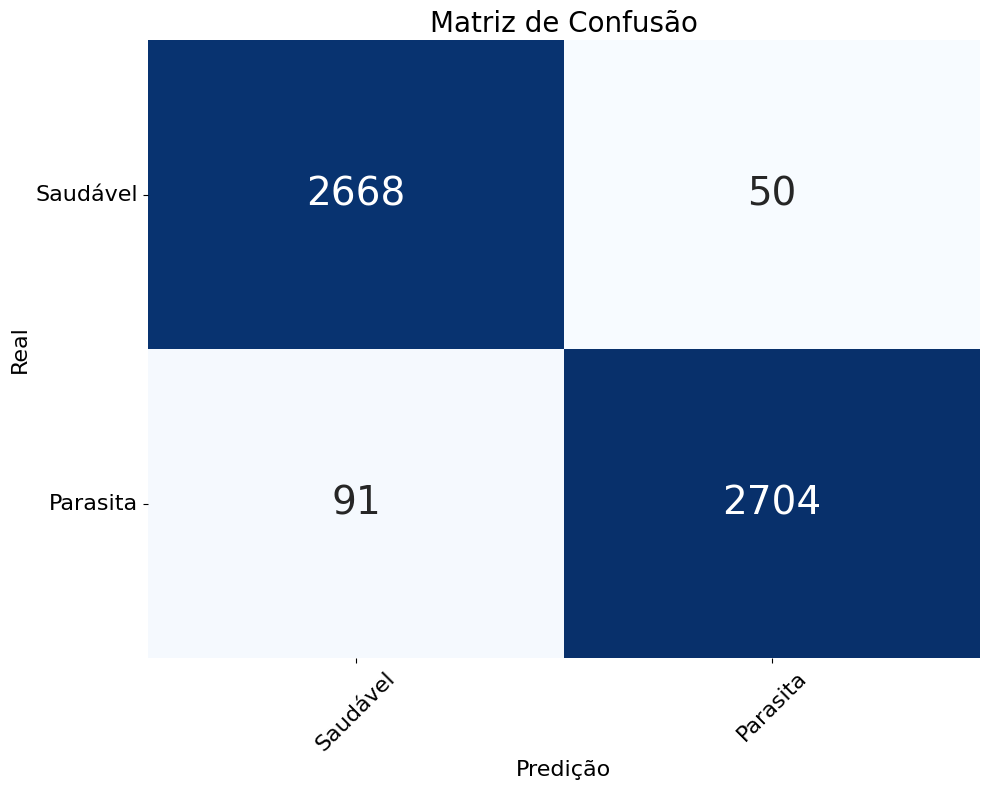

{'accuracy': 0.9744240885180483,
 'precision': 0.9744308124226964,
 'recall': 0.9745229905710423,
 'f1_score': 0.9744229978849938}

In [ ]:
# ========== TEST ==========
test_dataset = ImageData(test_df, transform=val_test_transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

evaluate_model(trained_model, test_loader, ["Saudável", "Parasita"])

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# === Função para plotar matriz de confusão ===
def plot_confusion_matrix(y_true, y_pred, class_names, fold_num, output_dir):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.title(f'Matriz de Confusão - Fold {fold_num}')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'matriz_confusao_fold_{fold_num}.png'), dpi=300)
    plt.close()

# === Função de avaliação do modelo ===
def evaluate_model(model, dataloader, class_names=None, fold_num=None, output_dir=None):
    model.eval()
    y_true = []
    y_pred = []
    device = next(model.parameters()).device  # Detectar dispositivo

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary', zero_division=0)
    rec = recall_score(y_true, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=0)

    if fold_num and output_dir and class_names:
        plot_confusion_matrix(y_true, y_pred, class_names, fold_num, output_dir)

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    }

# === Avaliação por fold ===
fold_metrics = []
num_folds = 5
output_dir = "resultados_fold"
os.makedirs(output_dir, exist_ok=True)

for fold in range(num_folds):
    print(f'\nAvaliação do Fold {fold + 1}')

    # Dataset e DataLoader do fold
    test_dataset = ImageData(test_df_list[fold], transform=val_test_transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

    # Avaliação com geração de matriz de confusão
    metrics = evaluate_model(
        trained_model_list[fold],
        test_loader,
        class_names=["Saudável", "Parasita"],
        fold_num=fold + 1,
        output_dir=output_dir
    )

    metrics['fold'] = f'Fold {fold + 1}'
    fold_metrics.append(metrics)

    # Gráfico de métricas por fold
    metric_names = ['accuracy', 'precision', 'recall', 'f1_score']
    values = [metrics[m] for m in metric_names]

    plt.figure(figsize=(6, 4))
    df_temp = pd.DataFrame({'Métrica': metric_names, 'Valor': values})
    sns.barplot(data=df_temp, x='Métrica', y='Valor', hue='Métrica', palette='Set3', legend=False)
    plt.ylim(0, 1.05)
    plt.title(f'Métricas - Fold {fold + 1}')
    plt.ylabel('Valor')
    plt.xlabel('Métrica')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'metricas_fold_{fold + 1}.png'), dpi=300)
    plt.close()

# === Tabela com todas as métricas ===
metrics_df = pd.DataFrame(fold_metrics)
metrics_df.to_csv(os.path.join(output_dir, 'metricas_folds.csv'), index=False)

# === Gráfico comparativo geral ===
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='fold', var_name='Métrica', value_name='Valor')
sns.barplot(data=metrics_melted, x='Métrica', y='Valor', hue='fold', palette='Set2')
plt.title('Comparação de Métricas entre os Folds')
plt.ylim(0, 1.05)
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Fold')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'grafico_comparativo_folds.png'), dpi=600)
plt.close()

print("✅ Avaliação finalizada. Resultados salvos em:", output_dir)




Avaliação do Fold 1

Avaliação do Fold 2

Avaliação do Fold 3

Avaliação do Fold 4

Avaliação do Fold 5
✅ Avaliação finalizada. Resultados salvos em: resultados_fold


In [ ]:
from google.colab import files
files.download('/content/resultados_fold')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

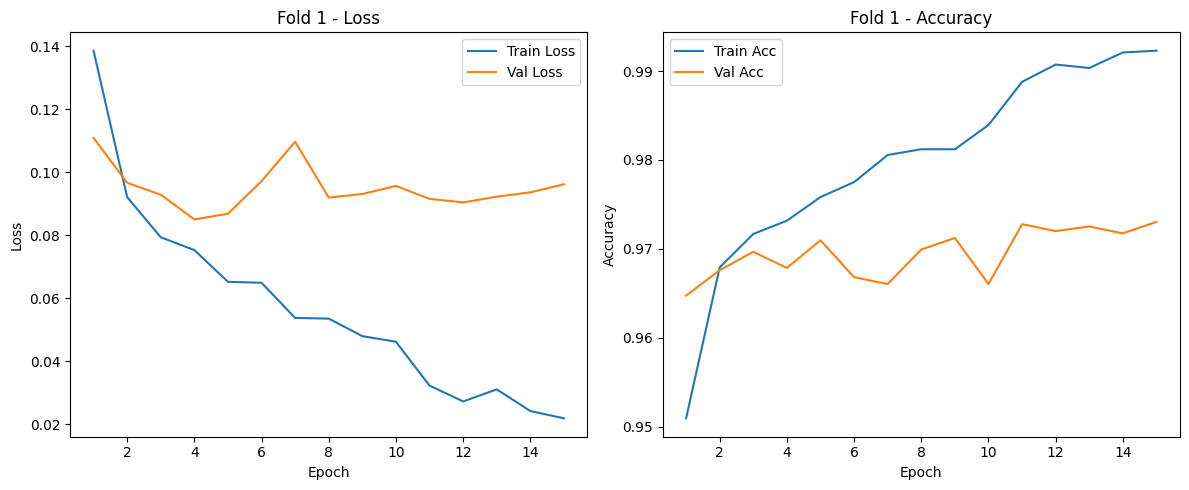

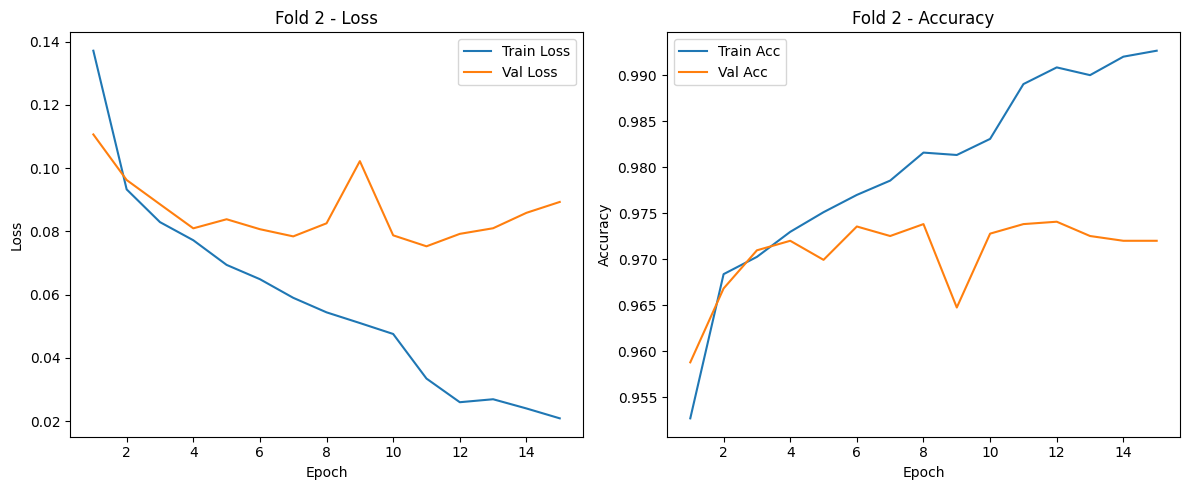

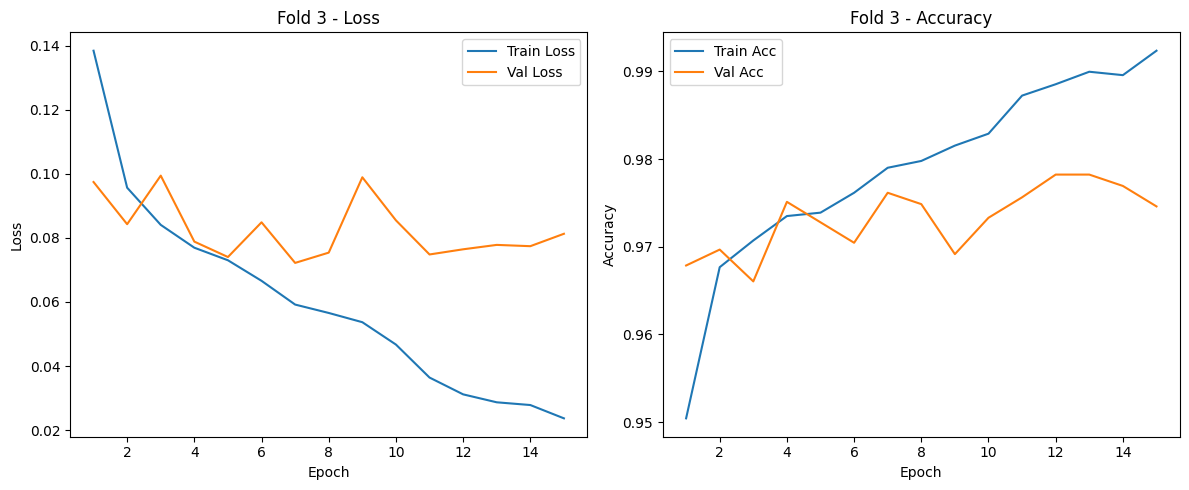

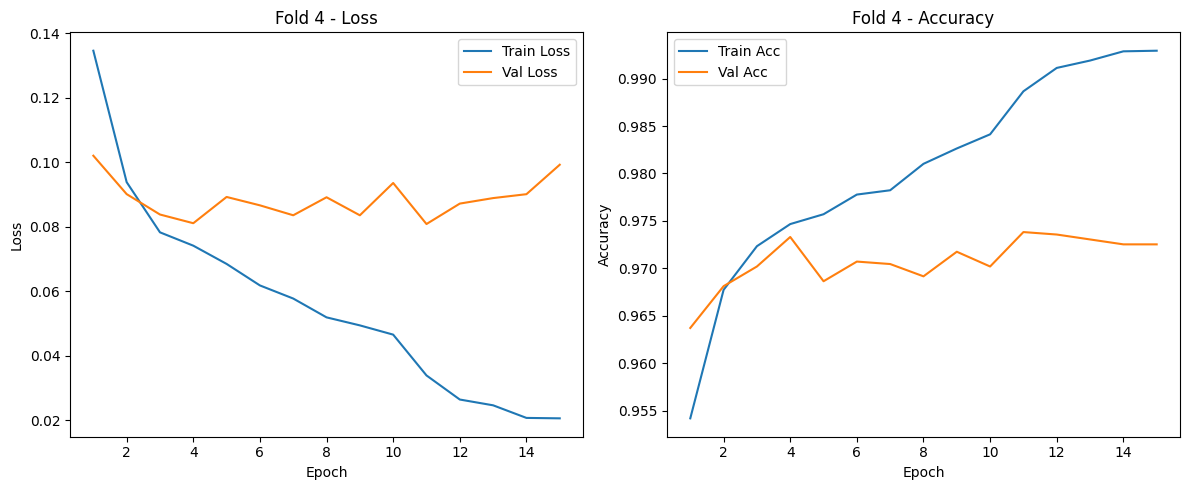

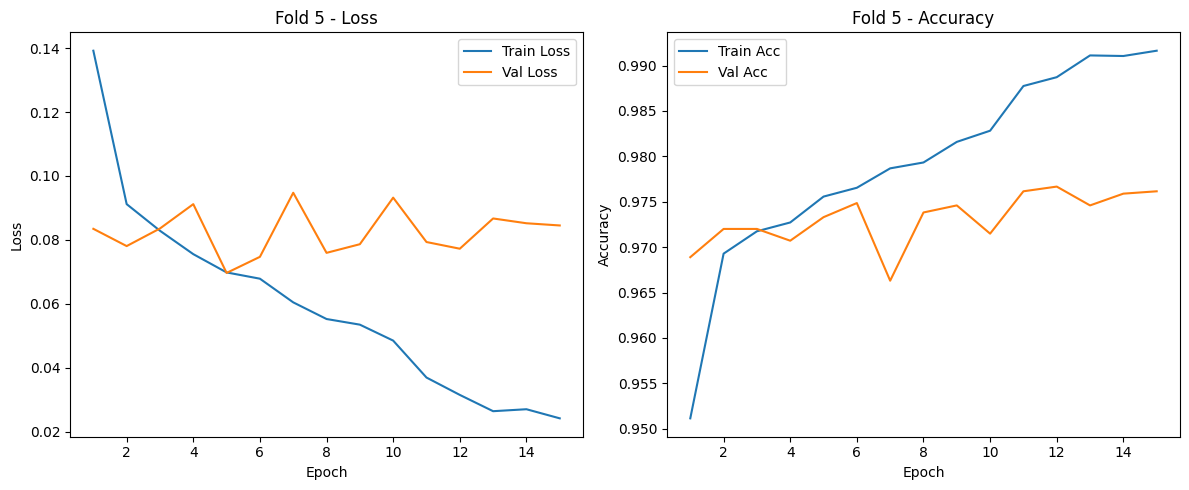

In [ ]:
# ========== PLOT DE DESEMPENHO POR FOLD ==========

def plot_history(fold_histories):
    for fold, history in enumerate(fold_histories):
        epochs = range(1, len(history['train_loss']) + 1)

        plt.figure(figsize=(12, 5))

        # Plot de Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, history['train_loss'], label='Train Loss')
        plt.plot(epochs, history['val_loss'], label='Val Loss')
        plt.title(f'Fold {fold+1} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot de Acurácia
        plt.subplot(1, 2, 2)
        plt.plot(epochs, history['train_acc'], label='Train Acc')
        plt.plot(epochs, history['val_acc'], label='Val Acc')
        plt.title(f'Fold {fold+1} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

plot_history(fold_results)


In [ ]:
torch.save(model.state_dict(), 'modelo_treinado_EfficientNet_15epo.pth')
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [ ]:
from google.colab import files
files.download('/content/modelo_treinado_EfficientNet_15epo.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def evaluate_model(model, dataloader, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(model.device) if hasattr(model, 'device') else inputs
            labels = labels.to(model.device) if hasattr(model, 'device') else labels

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Cálculo das métricas
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary')
    rec = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    # Opcional: imprimir matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    print(f'Matriz de Confusão:\n{cm}')

    # Retornar dicionário com as métricas
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    }


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Supondo que metrics_df já esteja carregado ---

# Reorganizar o DataFrame
metrics_melted = metrics_df.melt(id_vars='fold', var_name='Métrica', value_name='Valor')

# Gráfico de barras agrupado com cores vibrantes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Estilo limpo
sns.barplot(data=metrics_melted, x='Métrica', y='Valor', hue='fold', palette='tab10')  # Cores vibrantes

plt.title('Comparação de Métricas entre os Folds', fontsize=14, weight='bold')
plt.ylim(0, 1.05)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Métrica', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Fold', fontsize=10, title_fontsize=11, loc='upper right')
plt.tight_layout()

# Salvar gráfico em alta resolução
plt.savefig("grafico_comparativo_folds_vibrante.png", dpi=400)
plt.show()


NameError: name 'metrics_df' is not defined

In [ ]:
plt.savefig("matriz_confusao_pytorch_MoboleNetV3_15epo.png", dpi=600, bbox_inches="tight")

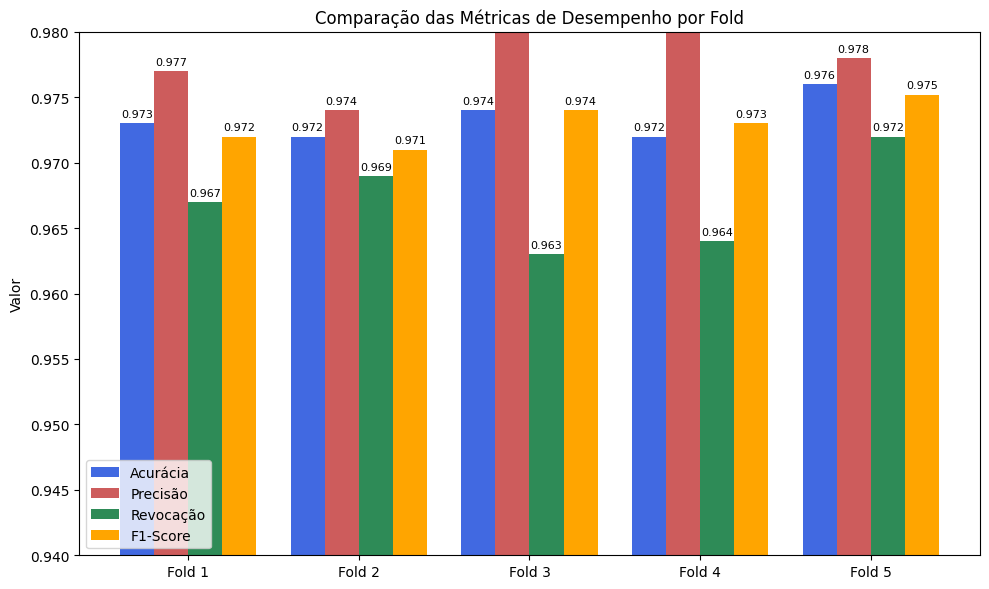

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
accuracy = [0.973,0.972,0.974,0.972,0.976]
precision = [0.977,0.974,0.985,0.982,0.978]
recall = [0.967,0.969,0.963,0.964,0.972,]
f1_score = [0.972,0.971,0.974,0.973,0.9752]

# Configurações do gráfico
x = np.arange(len(folds))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plotagem
bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Acurácia', color='royalblue')
bars2 = ax.bar(x - 0.5*width, precision, width, label='Precisão', color='indianred')
bars3 = ax.bar(x + 0.5*width, recall, width, label='Revocação', color='seagreen')
bars4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score', color='orange')

# Rótulos e título
ax.set_ylabel('Valor')
ax.set_ylim([0.94, 0.98])
ax.set_title('Comparação das Métricas de Desempenho por Fold ')
ax.set_xticks(x)
ax.set_xticklabels(folds)
ax.legend()

# Exibir valores acima das barras
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

for bars in [bars1, bars2, bars3, bars4]:
    annotate_bars(bars)

plt.tight_layout()
plt.show()


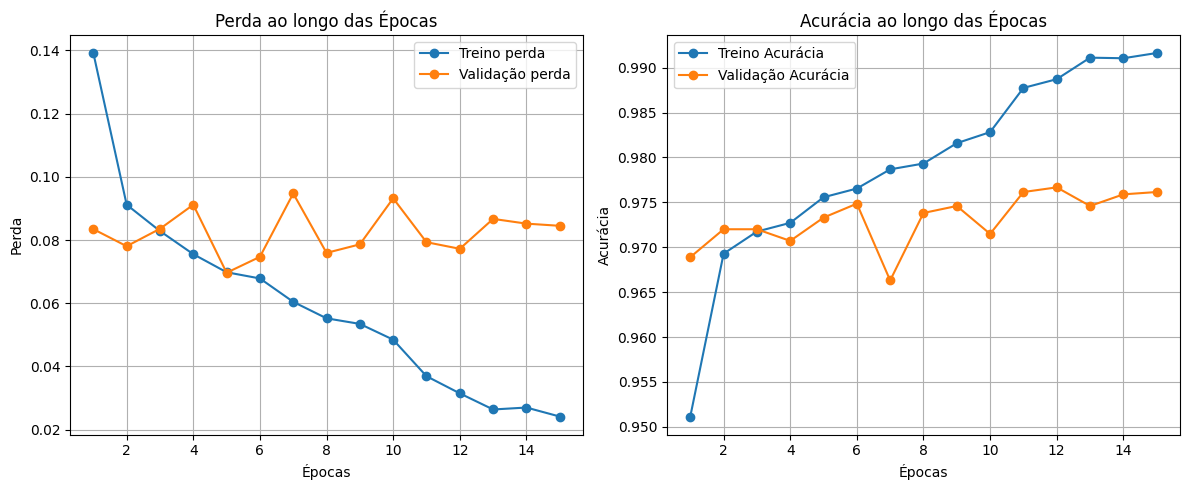

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Treino perda', marker='o')
    plt.plot(epochs, history['val_loss'], label='Validação perda', marker='o')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Perda ao longo das Épocas')
    plt.legend()
    plt.grid()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label='Treino Acurácia', marker='o')
    plt.plot(epochs, history['val_acc'], label='Validação Acurácia', marker='o')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title('Acurácia ao longo das Épocas')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Após o treinamento do modelo, chame a função com os dados do histórico
plot_training_history(history)


In [ ]:
# Salva o modelo inteiro incluindo arquitetura e pesos
torch.save(model.state_dict(), 'modelo_treinado_MobileNet_V3_15epo.pth')
print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


In [ ]:
#modelo+peso
torch.save(model, 'modelo_completo__MobileNet_V3_15epo.pth')

In [ ]:
import json

# Salvar os pesos do modelo
model_state_dict = model.state_dict()


# Converter os tensores para listas (JSON não suporta tensores diretamente)
model_state_dict_json = {key: value.tolist() for key, value in model_state_dict.items()}

# Salvar como JSON
with open('modelo_treinado_ResNet_50.json', 'w') as json_file:
    json.dump(model_state_dict_json, json_file)

print("Modelo salvo em JSON com sucesso!")

In [ ]:
# Carregar o JSON
with open('modelo_treinado_ResNet50.json', 'r') as json_file:
    model_state_dict_json = json.load(json_file)

# Converter listas de volta para tensores
model_state_dict = {key: torch.tensor(value) for key, value in model_state_dict_json.items()}

# Carregar os pesos no modelo
model.load_state_dict(model_state_dict)
model.to(device)  # Mover para GPU se necessário
model.eval()  # Definir para modo de avaliação

print("Modelo carregado com sucesso!")


In [ ]:
model = torch.load('modelo_completo_Resnet50_15epo.pth')
model.to(device)
model.eval()


In [ ]:
pip install torchsummary


In [ ]:
from torchsummary import summary

# modelo está na GPU (se disponível) ou na CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(num_classes=2).to(device)

# Exibir a estrutura do modelo
summary(model, input_size=(3, 224, 224))


In [ ]:
import torch
from torchsummary import summary
import io
import sys
import pandas as pd

# Criar o modelo e enviá-lo para o dispositivo correto
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(num_classes=2).to(device)

# Capturar a saída do summary() como string
buffer = io.StringIO()
sys.stdout = buffer
summary(model, input_size=(3, 224, 224))
sys.stdout = sys.__stdout__  # Restaurar a saída padrão

# Processar a saída capturada
summary_str = buffer.getvalue()

# Salvar como arquivo TXT
with open("model_summary_ResNet50.txt", "w") as f:
    f.write(summary_str)

print("Resumo salvo em model_summary.txt")


In [ ]:

































































































































































































































































































































































































































































ifgggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggmport torch
from torchsummary import summary
import io
import sys
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Criar o modelo e enviá-lo para o dispositivo correto
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(num_classes=2).to(device)

# Capturar a saída do summary() como string
buffer = io.StringIO()
sys.stdout = buffer
summary(model, input_size=(3, 224, 224))
sys.stdout = sys.__stdout__  # Restaurar a saída padrão
summary_str = buffer.getvalue()

# Configuração da imagem
img_width = 1200  # Largura da imagem
line_height = 20  # Altura de cada linha de texto
padding = 10      # Espaço ao redor do texto

# Processar as linhas do summary para a imagem
lines = summary_str.split("\n")
img_height = (len(lines) + 2) * line_height  # Altura baseada no número de linhas

# Criar imagem branca
image = Image.new("RGB", (img_width, img_height), "white")
draw = ImageDraw.Draw(image)

# Configurar a fonte (se disponível)
try:
    font = ImageFont.truetype("arial.ttf", 16)
except IOError:
    font = ImageFont.load_default()

# Desenhar o texto na imagem
y = padding
for line in lines:
    draw.text((padding, y), line, fill="black", font=font)
    y += line_height

# Salvar como PNG
image.save("model_summary_Resnet50.png")
print("Resumo salvo como model_summary.png")
